<a href="https://www.kaggle.com/code/handandegerli/unsupervised-learning?scriptVersionId=188063782" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install yellowbrick

In [2]:
################################
# Unsupervised Learning
################################

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder


In [3]:
################################
# K-Means
################################

df = pd.read_csv("/kaggle/input/usarrests-csv/USArrests.csv", index_col=0)

df.head()
df.isnull().sum()
df.info()
df.describe().T

sc = MinMaxScaler((0, 1))
df = sc.fit_transform(df)
df[0:5]

kmeans = KMeans(n_clusters=4, random_state=17).fit(df)
kmeans.get_params()

kmeans.n_clusters
kmeans.cluster_centers_
kmeans.labels_
kmeans.inertia_

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3.683456153585913

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

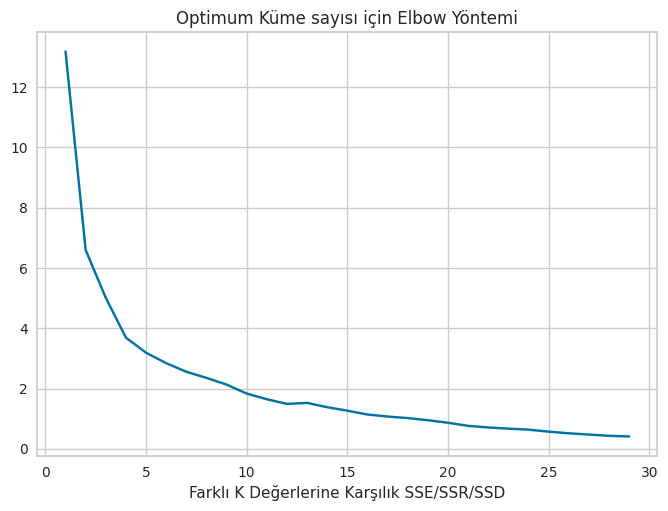

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

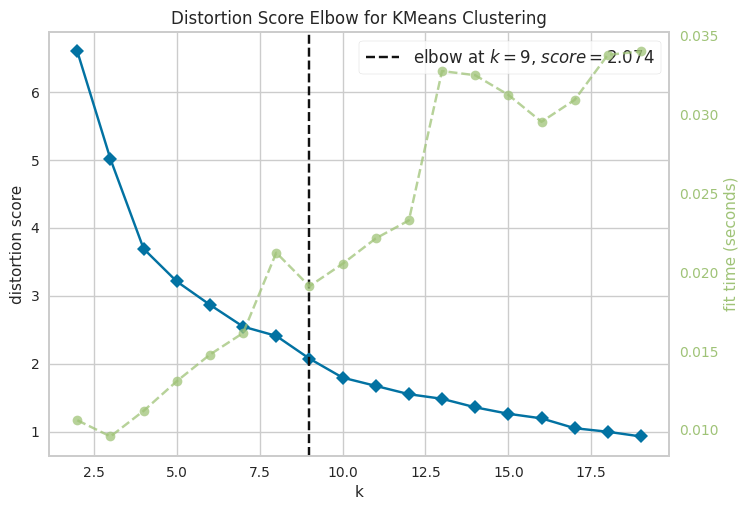

9

In [4]:
################################
# Optimum Küme Sayısının Belirlenmesi
################################

kmeans = KMeans()
ssd = []
K = range(1, 30)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(df)
    ssd.append(kmeans.inertia_)

plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşılık SSE/SSR/SSD")
plt.title("Optimum Küme sayısı için Elbow Yöntemi")
plt.show()

kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(df)
elbow.show()

elbow.elbow_value_

In [5]:
################################
# Final Cluster'ların Oluşturulması
################################

kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(df)

kmeans.n_clusters
kmeans.cluster_centers_
kmeans.labels_
df[0:5]

clusters_kmeans = kmeans.labels_

df = pd.read_csv("/kaggle/input/usarrests-csv/USArrests.csv", index_col=0)

df["cluster"] = clusters_kmeans

df.head()

df["cluster"] = df["cluster"] + 1

df[df["cluster"]==5]

df.groupby("cluster").agg(["count","mean","median"])

df.to_csv("clusters.csv")

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


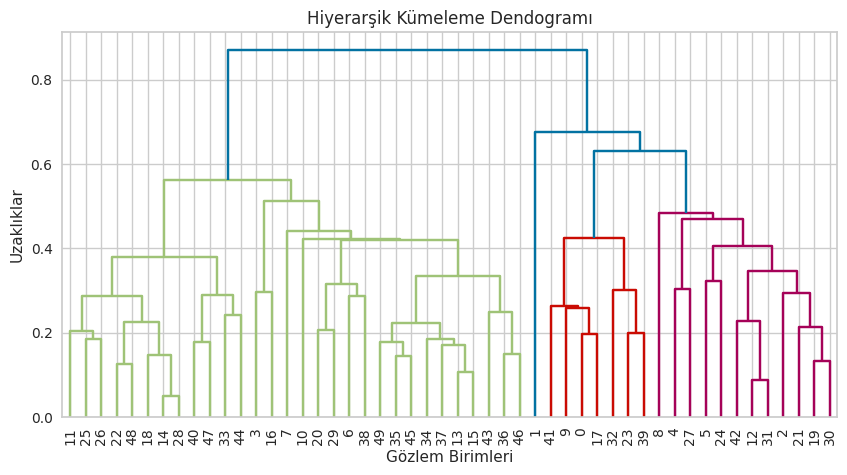

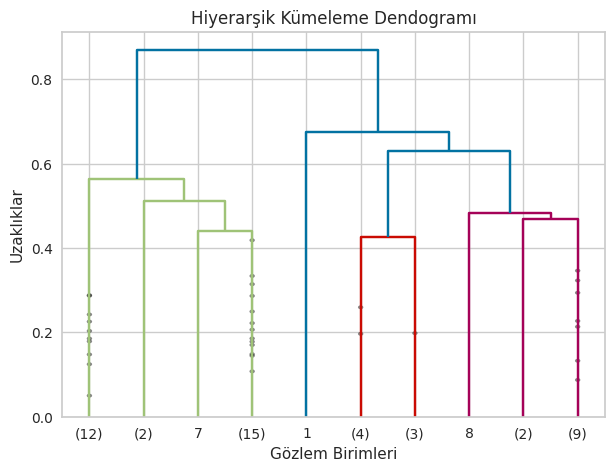

In [6]:
################################
# Hierarchical Clustering
################################

df = pd.read_csv("/kaggle/input/usarrests-csv/USArrests.csv", index_col=0)

sc = MinMaxScaler((0, 1))
df = sc.fit_transform(df)

hc_average = linkage(df, "average")

plt.figure(figsize=(10, 5))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average,
           leaf_font_size=10)
plt.show()
plt.figure(figsize=(7, 5))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average,
           truncate_mode="lastp",
           p=10,
           show_contracted=True,
           leaf_font_size=10)
plt.show()

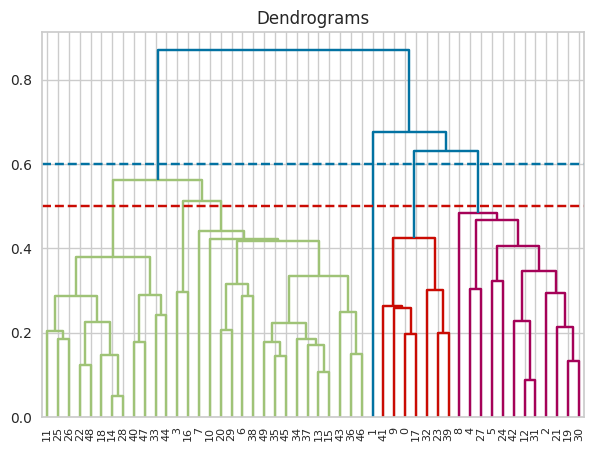

In [7]:
################################
# Kume Sayısını Belirlemek
################################


plt.figure(figsize=(7, 5))
plt.title("Dendrograms")
dend = dendrogram(hc_average)
plt.axhline(y=0.5, color='r', linestyle='--')
plt.axhline(y=0.6, color='b', linestyle='--')
plt.show()


In [8]:
################################
# Final Modeli Oluşturmak
################################

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, linkage="average")

clusters = cluster.fit_predict(df)

df = pd.read_csv("/kaggle/input/usarrests-csv/USArrests.csv", index_col=0)
df["hi_cluster_no"] = clusters

df["hi_cluster_no"] = df["hi_cluster_no"] + 1

df["kmeans_cluster_no"] = clusters_kmeans
df["kmeans_cluster_no"] = df["kmeans_cluster_no"]  + 1

df_filtered = df.loc[(df['kmeans_cluster_no'] == 2) & (df['hi_cluster_no'] == 2)]

df.head()

,Murder,Assault,UrbanPop,Rape,hi_cluster_no,kmeans_cluster_no
Alabama,13.2,236,58,21.2,4,5
Alaska,10.0,263,48,44.5,3,7
Arizona,8.1,294,80,31.0,2,2
Arkansas,8.8,190,50,19.5,1,1
California,9.0,276,91,40.6,2,6


In [9]:
################################
# Principal Component Analysis
################################

df = pd.read_csv("/kaggle/input/hitters/hitters.csv")
df.head()

num_cols = [col for col in df.columns if df[col].dtypes != "O" and "Salary" not in col]

df[num_cols].head()

df = df[num_cols]
df.dropna(inplace=True)
df.shape

df = StandardScaler().fit_transform(df)

pca = PCA()
pca_fit = pca.fit_transform(df)

pca.explained_variance_ratio_
np.cumsum(pca.explained_variance_ratio_)

array([0.46037855, 0.72077704, 0.82416565, 0.87785586, 0.91993427,
       0.94957018, 0.96527809, 0.9766709 , 0.9845032 , 0.9903799 ,
       0.99412755, 0.99722139, 0.99877819, 0.99963722, 0.99992409,
       1.        ])

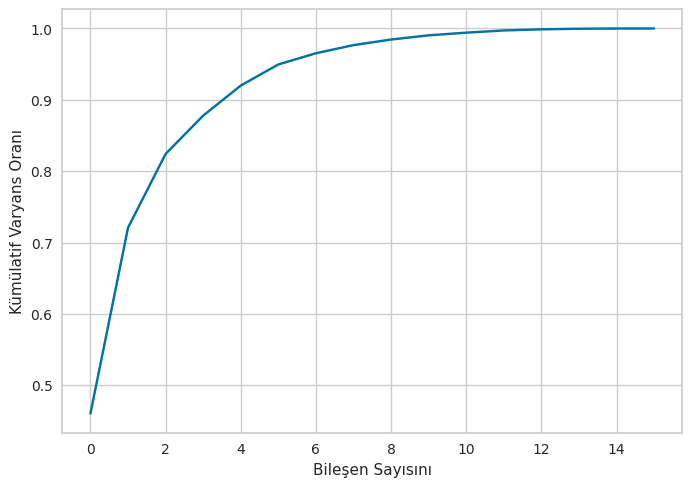

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [10]:
################################
# Optimum Bileşen Sayısı
################################

pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Bileşen Sayısını")
plt.ylabel("Kümülatif Varyans Oranı")
plt.show()

################################
# Final PCA'in Oluşturulması
################################

pca = PCA(n_components=3)
pca_fit = pca.fit_transform(df)

pca.explained_variance_ratio_
np.cumsum(pca.explained_variance_ratio_)


################################
# BONUS: Principal Component Regression
################################

df = pd.read_csv("/kaggle/input/hitters/hitters.csv")
df.shape

len(pca_fit)

num_cols = [col for col in df.columns if df[col].dtypes != "O" and "Salary" not in col]
len(num_cols)

others = [col for col in df.columns if col not in num_cols]

pd.DataFrame(pca_fit, columns=["PC1","PC2","PC3"]).head()

df[others].head()

final_df = pd.concat([pd.DataFrame(pca_fit, columns=["PC1","PC2","PC3"]),
                      df[others]], axis=1)
final_df.head()


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

for col in ["NewLeague", "Division", "League"]:
    label_encoder(final_df, col)

final_df.dropna(inplace=True)

y = final_df["Salary"]
X = final_df.drop(["Salary"], axis=1)

lm = LinearRegression()
rmse = np.mean(np.sqrt(-cross_val_score(lm, X, y, cv=5, scoring="neg_mean_squared_error")))
y.mean()


cart = DecisionTreeRegressor()
rmse = np.mean(np.sqrt(-cross_val_score(cart, X, y, cv=5, scoring="neg_mean_squared_error")))

cart_params = {'max_depth': range(1, 11),
               "min_samples_split": range(2, 20)}

# GridSearchCV
cart_best_grid = GridSearchCV(cart,
                              cart_params,
                              cv=5,
                              n_jobs=-1,
                              verbose=True).fit(X, y)

cart_final = DecisionTreeRegressor(**cart_best_grid.best_params_, random_state=17).fit(X, y)

rmse = np.mean(np.sqrt(-cross_val_score(cart_final, X, y, cv=5, scoring="neg_mean_squared_error")))


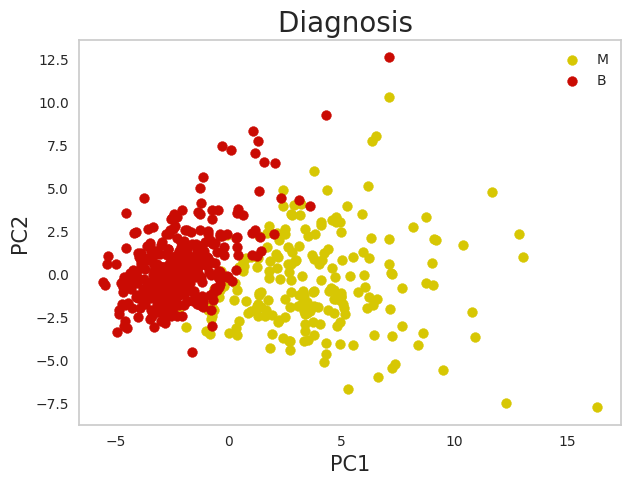

In [11]:
################################
# BONUS: PCA ile Çok Boyutlu Veriyi 2 Boyutta Görselleştirme
################################

################################
# Breast Cancer
################################

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

df = pd.read_csv("/kaggle/input/breast-cancer/breast_cancer.csv")

y = df["diagnosis"]
X = df.drop(["diagnosis", "id"], axis=1)


def create_pca_df(X, y):
    X = StandardScaler().fit_transform(X)
    pca = PCA(n_components=2)
    pca_fit = pca.fit_transform(X)
    pca_df = pd.DataFrame(data=pca_fit, columns=['PC1', 'PC2'])
    final_df = pd.concat([pca_df, pd.DataFrame(y)], axis=1)
    return final_df

pca_df = create_pca_df(X, y)
def plot_pca(dataframe, target):
    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('PC1', fontsize=15)
    ax.set_ylabel('PC2', fontsize=15)
    ax.set_title(f'{target.capitalize()} ', fontsize=20)

    targets = list(dataframe[target].unique())
    colors = random.sample(['r', 'b', "g", "y"], len(targets))

    for t, color in zip(targets, colors):
        indices = dataframe[target] == t
        ax.scatter(dataframe.loc[indices, 'PC1'], dataframe.loc[indices, 'PC2'], c=color, s=50)
    ax.legend(targets)
    ax.grid()
    plt.show()

plot_pca(pca_df, "diagnosis")

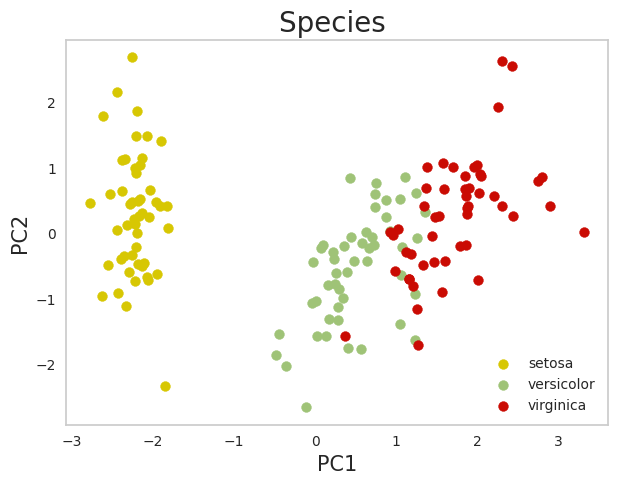

In [12]:
################################
# Iris
################################

import seaborn as sns
df = sns.load_dataset("iris")

y = df["species"]
X = df.drop(["species"], axis=1)

pca_df = create_pca_df(X, y)

plot_pca(pca_df, "species")


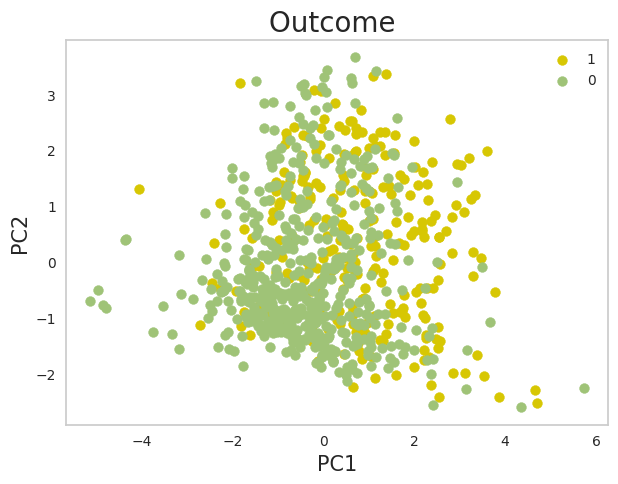

In [13]:
################################
# Diabetes
################################

df = pd.read_csv("/kaggle/input/diabetes/diabetes.csv")

y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

pca_df = create_pca_df(X, y)

plot_pca(pca_df, "Outcome")